In [ ]:
#Import needed libraries
import os, shutil
from PIL import Image, ImageOps

#Standard Libraries
import numpy as np
import pandas as pd

# Visualizations
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix, classification_report, ConfusionMatrixDisplay

#TensorFlow
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img
from keras import models, layers, optimizers, regularizers
from tensorflow.keras import Model
from tensorflow.data.experimental import cardinality
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense # creates densely connected layer object
from tensorflow.keras.layers import Flatten # takes 2D input and turns into 1D array
from tensorflow.keras.layers import Conv2D # convolution layer
from tensorflow.keras.layers import MaxPooling2D # max pooling layer
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

#Transfer Learning
from keras.applications import ResNet50, VGG19, VGG16

In [ ]:
import zipfile
import os

zip_path = '/content/EuroSAT.zip'

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/EuroSAT')

# Define paths for each category within the extracted '2750' folder
data_AnnualCrop = '/content/EuroSAT/2750/AnnualCrop'
data_Forest = '/content/EuroSAT/2750/Forest'
data_HerbaceousVegetation = '/content/EuroSAT/2750/HerbaceousVegetation'
data_Highway = '/content/EuroSAT/2750/Highway'
data_Industrial = '/content/EuroSAT/2750/Industrial'
data_Pasture = '/content/EuroSAT/2750/Pasture'
data_PermanentCrop = '/content/EuroSAT/2750/PermanentCrop'
data_Residential = '/content/EuroSAT/2750/Residential'
data_River = '/content/EuroSAT/2750/River'
data_SeaLake = '/content/EuroSAT/2750/SeaLake'




In [ ]:
zip_path = '/content/split_dataset.zip'

# Extract only the 'split' folder from the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    # List all files and directories in the zip
    for file in zip_ref.namelist():
        if file.startswith('data/split/'):  # Only extract files in the 'split' folder
            zip_ref.extract(file, '/content/')

# Define path to the extracted 'split' folder
new_dir = '/content/data/split/'

In [ ]:
#Create objects that store all the relevant image names.
imgs_AnnualCrop = [file for file in os.listdir(data_AnnualCrop) if file.endswith('.jpg')]
imgs_Forest = [file for file in os.listdir(data_Forest) if file.endswith('.jpg')]
imgs_HerbaceousVegetation = [file for file in os.listdir(data_HerbaceousVegetation) if file.endswith('.jpg')]
imgs_Highway = [file for file in os.listdir(data_Highway) if file.endswith('.jpg')]
imgs_Industrial = [file for file in os.listdir(data_Industrial) if file.endswith('.jpg')]
imgs_Pasture = [file for file in os.listdir(data_Pasture) if file.endswith('.jpg')]
imgs_PermanentCrop = [file for file in os.listdir(data_PermanentCrop) if file.endswith('.jpg')]
imgs_Residential = [file for file in os.listdir(data_Residential) if file.endswith('.jpg')]
imgs_River = [file for file in os.listdir(data_River) if file.endswith('.jpg')]
imgs_SeaLake = [file for file in os.listdir(data_SeaLake) if file.endswith('.jpg')]

In [ ]:
# Define the path to the new split folder
new_dir = '/content/data/split/'

# Create the necessary parent directory before making the split folder
os.makedirs(new_dir, exist_ok=True)



In [ ]:
#Set up the Train folder and subfolders
train_folder = os.path.join(new_dir, 'train')
train_AnnualCrop = os.path.join(train_folder, 'AnnualCrop')
train_Forest = os.path.join(train_folder, 'Forest')
train_HerbaceousVegetation = os.path.join(train_folder, 'HerbaceousVegetation')
train_Highway = os.path.join(train_folder, 'Highway')
train_Industrial = os.path.join(train_folder, 'Industrial')
train_Pasture = os.path.join(train_folder, 'Pasture')
train_PermanentCrop = os.path.join(train_folder, 'PermanentCrop')
train_Residential = os.path.join(train_folder, 'Residential')
train_River = os.path.join(train_folder, 'River')
train_SeaLake = os.path.join(train_folder, 'SeaLake')


In [ ]:
#Set up the Test folder and subfolders
test_folder = os.path.join(new_dir, 'test')
test_AnnualCrop = os.path.join(test_folder, 'AnnualCrop')
test_Forest = os.path.join(test_folder, 'Forest')
test_HerbaceousVegetation = os.path.join(test_folder, 'HerbaceousVegetation')
test_Highway = os.path.join(test_folder, 'Highway')
test_Industrial = os.path.join(test_folder, 'Industrial')
test_Pasture = os.path.join(test_folder, 'Pasture')
test_PermanentCrop = os.path.join(test_folder, 'PermanentCrop')
test_Residential = os.path.join(test_folder, 'Residential')
test_River = os.path.join(test_folder, 'River')
test_SeaLake = os.path.join(test_folder, 'SeaLake')

In [ ]:
# Make the Train directories(folders)
os.mkdir(train_folder)
os.mkdir(train_AnnualCrop)
os.mkdir(train_Forest)
os.mkdir(train_HerbaceousVegetation)
os.mkdir(train_Highway)
os.mkdir(train_Industrial)
os.mkdir(train_Pasture)
os.mkdir(train_PermanentCrop)
os.mkdir(train_Residential)
os.mkdir(train_River)
os.mkdir(train_SeaLake)

# Make the Test directories(folders)
os.mkdir(test_folder)
os.mkdir(test_AnnualCrop)
os.mkdir(test_Forest)
os.mkdir(test_HerbaceousVegetation)
os.mkdir(test_Highway)
os.mkdir(test_Industrial)
os.mkdir(test_Pasture)
os.mkdir(test_PermanentCrop)
os.mkdir(test_Residential)
os.mkdir(test_River)
os.mkdir(test_SeaLake)

FileExistsError: [Errno 17] File exists: '/content/data/split/train'

In [ ]:
# Compile 80% of images into folders- Train
imgs = imgs_AnnualCrop[:2400]
for img in imgs:
    origin = os.path.join(data_AnnualCrop, img)
    destination = os.path.join(train_AnnualCrop, img)
    shutil.copyfile(origin, destination)

imgs = imgs_Forest[:2400]
for img in imgs:
    origin = os.path.join(data_Forest, img)
    destination = os.path.join(train_Forest, img)
    shutil.copyfile(origin, destination)

imgs = imgs_HerbaceousVegetation[:2400]
for img in imgs:
    origin = os.path.join(data_HerbaceousVegetation, img)
    destination = os.path.join(train_HerbaceousVegetation, img)
    shutil.copyfile(origin, destination)

imgs = imgs_Highway[:2000]
for img in imgs:
    origin = os.path.join(data_Highway, img)
    destination = os.path.join(train_Highway, img)
    shutil.copyfile(origin, destination)

imgs = imgs_Industrial[:2000]
for img in imgs:
    origin = os.path.join(data_Industrial, img)
    destination = os.path.join(train_Industrial, img)
    shutil.copyfile(origin, destination)

imgs = imgs_Pasture[:1600]
for img in imgs:
    origin = os.path.join(data_Pasture, img)
    destination = os.path.join(train_Pasture, img)
    shutil.copyfile(origin, destination)

imgs = imgs_PermanentCrop[:2000]
for img in imgs:
    origin = os.path.join(data_PermanentCrop, img)
    destination = os.path.join(train_PermanentCrop, img)
    shutil.copyfile(origin, destination)

imgs = imgs_Residential[:2400]
for img in imgs:
    origin = os.path.join(data_Residential, img)
    destination = os.path.join(train_Residential, img)
    shutil.copyfile(origin, destination)

imgs = imgs_River[:2000]
for img in imgs:
    origin = os.path.join(data_River, img)
    destination = os.path.join(train_River, img)
    shutil.copyfile(origin, destination)

imgs = imgs_SeaLake[:2400]
for img in imgs:
    origin = os.path.join(data_SeaLake, img)
    destination = os.path.join(train_SeaLake, img)
    shutil.copyfile(origin, destination)

In [ ]:
# Compile other 20% of images into folders- Test
imgs = imgs_AnnualCrop[2400:] #600
for img in imgs:
    origin = os.path.join(data_AnnualCrop, img)
    destination = os.path.join(test_AnnualCrop, img)
    shutil.copyfile(origin, destination)

imgs = imgs_Forest[2400:] #600
for img in imgs:
    origin = os.path.join(data_Forest, img)
    destination = os.path.join(test_Forest, img)
    shutil.copyfile(origin, destination)

imgs = imgs_HerbaceousVegetation[2400:] #600
for img in imgs:
    origin = os.path.join(data_HerbaceousVegetation, img)
    destination = os.path.join(test_HerbaceousVegetation, img)
    shutil.copyfile(origin, destination)

imgs = imgs_Highway[2000:] #500
for img in imgs:
    origin = os.path.join(data_Highway, img)
    destination = os.path.join(test_Highway, img)
    shutil.copyfile(origin, destination)

imgs = imgs_Industrial[2000:] #500
for img in imgs:
    origin = os.path.join(data_Industrial, img)
    destination = os.path.join(test_Industrial, img)
    shutil.copyfile(origin, destination)

imgs = imgs_Pasture[1600:] #400
for img in imgs:
    origin = os.path.join(data_Pasture, img)
    destination = os.path.join(test_Pasture, img)
    shutil.copyfile(origin, destination)

imgs = imgs_PermanentCrop[2000:] #500
for img in imgs:
    origin = os.path.join(data_PermanentCrop, img)
    destination = os.path.join(test_PermanentCrop, img)
    shutil.copyfile(origin, destination)

imgs = imgs_Residential[2400:] #600
for img in imgs:
    origin = os.path.join(data_Residential, img)
    destination = os.path.join(test_Residential, img)
    shutil.copyfile(origin, destination)

imgs = imgs_River[2000:] #500
for img in imgs:
    origin = os.path.join(data_River, img)
    destination = os.path.join(test_River, img)
    shutil.copyfile(origin, destination)

imgs = imgs_SeaLake[2400:] #600
for img in imgs:
    origin = os.path.join(data_SeaLake, img)
    destination = os.path.join(test_SeaLake, img)
    shutil.copyfile(origin, destination)

In [ ]:
train_folder = 'data/split/train'
test_folder = 'data/split/test'

# Normalize images
train_gen = ImageDataGenerator(rescale=1./255, validation_split = 0.125)
test_gen = ImageDataGenerator(rescale=1./255)

#Import data as 70% Train (10% Validation of orginal data set) and 20% Test
train_generator = train_gen.flow_from_directory(train_folder,
                                                class_mode = 'categorical',
                                                subset ='training',
                                                batch_size=128,
                                                shuffle=True,
                                                seed=42)

val_generator= train_gen.flow_from_directory(train_folder,
                                             class_mode= 'categorical',
                                             subset = "validation",
                                             batch_size=128,
                                             shuffle=True,
                                             seed=42)

test_generator= test_gen.flow_from_directory(test_folder,
                                              class_mode= 'categorical',
                                              batch_size=128,
                                              shuffle=False,
                                              seed=42)

Found 18900 images belonging to 10 classes.
Found 2700 images belonging to 10 classes.
Found 5400 images belonging to 10 classes.


In [ ]:
# create the data sets
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)
val_images, val_labels = next(val_generator)

In [ ]:
#Confirm class balance for train and test
train_classes = train_generator.classes
val_classes = val_generator.classes
test_classes = test_generator.classes

#Look at image distribution by class across train, test, and validation sets.
train_class, train_count = np.unique(train_classes, return_counts=True)
val_class, val_count = np.unique(val_classes, return_counts=True)
test_class, test_count = np.unique(test_classes, return_counts=True)

print('Train ~ {}'.format(list(zip(train_class, train_count))))
print('Validation ~ {}'.format(list(zip(val_class, val_count))))
print('Test ~ {}'.format(list(zip(test_class, test_count))))

Train ~ [(0, 2100), (1, 2100), (2, 2100), (3, 1750), (4, 1750), (5, 1400), (6, 1750), (7, 2100), (8, 1750), (9, 2100)]
Validation ~ [(0, 300), (1, 300), (2, 300), (3, 250), (4, 250), (5, 200), (6, 250), (7, 300), (8, 250), (9, 300)]
Test ~ [(0, 600), (1, 600), (2, 600), (3, 500), (4, 500), (5, 400), (6, 500), (7, 600), (8, 500), (9, 600)]


In [ ]:
#Checking the classes in our train data
train_class_names = train_generator.class_indices
print('Train:', train_class_names)

#Checking the classes in our validation data
val_class_names = val_generator.class_indices
print('Validation:', val_class_names)

#Checking the classes in our test data
test_class_names = test_generator.class_indices
print('Train:', test_class_names)

Train: {'AnnualCrop': 0, 'Forest': 1, 'HerbaceousVegetation': 2, 'Highway': 3, 'Industrial': 4, 'Pasture': 5, 'PermanentCrop': 6, 'Residential': 7, 'River': 8, 'SeaLake': 9}
Validation: {'AnnualCrop': 0, 'Forest': 1, 'HerbaceousVegetation': 2, 'Highway': 3, 'Industrial': 4, 'Pasture': 5, 'PermanentCrop': 6, 'Residential': 7, 'River': 8, 'SeaLake': 9}
Train: {'AnnualCrop': 0, 'Forest': 1, 'HerbaceousVegetation': 2, 'Highway': 3, 'Industrial': 4, 'Pasture': 5, 'PermanentCrop': 6, 'Residential': 7, 'River': 8, 'SeaLake': 9}


In [ ]:
# Preview the shape of both the images and labels for both the train, validation, and test sets (8 objects total)
print("Train")
print(np.shape(train_images))
print(np.shape(train_labels))
print("Validation")
print(np.shape(val_images))
print(np.shape(val_labels))
print("Test")
print(np.shape(test_images))
print(np.shape(test_labels))

Train
(128, 256, 256, 3)
(128, 10)
Validation
(128, 256, 256, 3)
(128, 10)
Test
(128, 256, 256, 3)
(128, 10)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


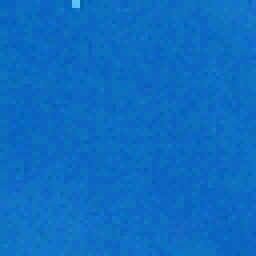

In [ ]:
# Preview a train data image
print(train_labels[0])
array_to_img(train_images[0])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


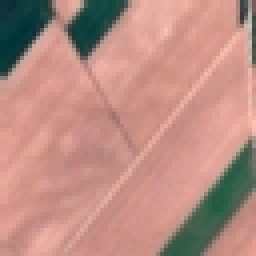

In [ ]:
# Preview a test data image
print(test_labels[0])
array_to_img(test_images[0])

In [ ]:
#Instantiate a Sequential model
model_eight = Sequential()


# Input Layer- Convolution
model_eight.add(Conv2D(filters=32,
                          kernel_size=(3, 3),
                          activation='relu',
                          input_shape= (256, 256, 3)))


# Layer 1- max pool in 2x2 window
model_eight.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 2- another convolution layer
model_eight.add(layers.Conv2D(32, (3, 3), activation='relu'))

# Layer 3- another max pool layer
model_eight.add(layers.MaxPooling2D((2, 2)))

# Layer 4- another convolution layer
model_eight.add(layers.Conv2D(32, (3, 3), activation='relu'))

# Layer 5- another max pool layer
model_eight.add(layers.MaxPooling2D((2, 2)))

# Layer 6- connect all nodes with dense layer
model_eight.add(Flatten())
model_eight.add(Dense(64, activation='relu'))

# Layer 7- dense layer
model_eight.add(Dense(64, activation='relu'))

# Output Layer- softmax activiation for multi-categorical with 10 classes
model_eight.add(Dense(10, activation='softmax'))

#Compile the sequential CNN model- adam optimizer,
# categorical_crossentropy loss, and set our metric to accuracy
model_eight.compile(optimizer='adam',
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

# print model summary
model_eight.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 28800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       1,843,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,867,466 (7.12 MB)

 Trainable params: 1,867,466 (7.12 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Define Stopping Criteria
valcallback = EarlyStopping(monitor='val_accuracy', mode='max', verbose = 1, patience = 2)


# Fit the model
model_eight_history = model_eight.fit(train_generator,
                                  epochs= 20,
                                  validation_data = val_generator,
                                  callbacks= valcallback,
                                  batch_size=128,
                                  verbose = 1)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


148/148 ━━━━━━━━━━━━━━━━━━━━ 72s 377ms/step - accuracy: 0.2960 - loss: 1.8482 - val_accuracy: 0.5641 - val_loss: 1.2094
Epoch 2/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 45s 294ms/step - accuracy: 0.5840 - loss: 1.1316 - val_accuracy: 0.6630 - val_loss: 0.9362
Epoch 3/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 45s 289ms/step - accuracy: 0.6820 - loss: 0.8644 - val_accuracy: 0.7237 - val_loss: 0.7873
Epoch 4/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 45s 291ms/step - accuracy: 0.7443 - loss: 0.7142 - val_accuracy: 0.6785 - val_loss: 0.8807
Epoch 5/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 87s 323ms/step - accuracy: 0.7700 - loss: 0.6375 - val_accuracy: 0.7530 - val_loss: 0.6774
Epoch 6/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 45s 296ms/step - accuracy: 0.8042 - loss: 0.5523 - val_accuracy: 0.7970 - val_loss: 0.6024
Epoch 7/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 44s 290ms/step - accuracy: 0.8247 - loss: 0.4941 - val_accuracy: 0.7904 - val_loss: 0.6035
Epoch 8/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 83s 297ms/step - accuracy: 0.8538 - loss: 0.4081 - val

In [ ]:
#Check loss and accuracy on test data
test_loss, test_acc = model_eight.evaluate(test_generator, verbose = 1)

print('Test loss: ', test_loss)
print('Test accuracy: ', test_acc)

43/43 ━━━━━━━━━━━━━━━━━━━━ 12s 270ms/step - accuracy: 0.7813 - loss: 0.6369
Test loss:  0.6574758887290955
Test accuracy:  0.7740740776062012


In [ ]:
#Import Data from Google Drive to use in Google Colab
train_folder = 'data/split/train'
test_folder = 'data/split/test'

# Normalize images
train_gen = ImageDataGenerator(rescale=1./255, validation_split = 0.125)
test_gen = ImageDataGenerator(rescale=1./255)

#Import data as 70% Train (10% Validation of orginal data set) and 20% Test
train_generator = train_gen.flow_from_directory(train_folder,
                                                class_mode = 'categorical',
                                                subset ='training',
                                                batch_size=128,
                                                shuffle=True,
                                                seed=42)

val_generator= train_gen.flow_from_directory(train_folder,
                                             class_mode= 'categorical',
                                             subset = "validation",
                                             batch_size=128,
                                             shuffle=True,
                                             seed=42)

test_generator= test_gen.flow_from_directory(test_folder,
                                              class_mode= 'categorical',
                                              batch_size=128,
                                              shuffle=False,
                                              seed=42)

Found 18900 images belonging to 10 classes.
Found 2700 images belonging to 10 classes.
Found 5400 images belonging to 10 classes.


In [ ]:
#Instantiate a Sequential model
model_twelve = Sequential()


# Input Layer- Convolution
model_twelve.add(Conv2D(filters=128,
                          kernel_size=(3, 3),
                          activation='relu',
                          input_shape= (256, 256, 3)))


# Layer 1- max pool in 2x2 window
model_twelve.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 2- another convolution layer
model_twelve.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Layer 3- another max pool layer
model_twelve.add(layers.MaxPooling2D((2, 2)))

# Layer 4- another convolution layer
model_twelve.add(layers.Conv2D(32, (3, 3), activation='relu'))

# Layer 5- another max pool layer
model_twelve.add(layers.MaxPooling2D((2, 2)))

# Layer 6- another convolution layer
model_twelve.add(layers.Conv2D(16, (3, 3), activation='relu'))

# Layer 7- another max pool layer
model_twelve.add(layers.MaxPooling2D((2, 2)))

# Layer 8- connect all nodes with dense layer
model_twelve.add(Flatten())
model_twelve.add(Dense(512, activation='relu'))
model_twelve.add(layers.Dropout(0.2))

# Layer 9- dense layer
model_twelve.add(Dense(256, activation='relu'))
model_twelve.add(layers.Dropout(0.2))

# Layer 10- dense layer
model_twelve.add(Dense(128, activation='relu'))
model_twelve.add(layers.Dropout(0.2))

# Layer 11- dense layer
model_twelve.add(Dense(32, activation='relu'))
model_twelve.add(layers.Dropout(0.2))

# Layer 12- dense layer
model_twelve.add(Dense(16, activation='relu'))
model_twelve.add(layers.Dropout(0.2))

# Output Layer- softmax activiation for multi-categorical with 10 classes
model_twelve.add(Dense(10, activation='softmax'))

#Compile the sequential CNN model- adam optimizer,
# categorical_crossentropy loss, and set our metric to accuracy
model_twelve.compile(optimizer='adam',
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

# print model summary
model_twelve.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 254, 254, 128)       │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 127, 127, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 125, 125, 64)        │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 60, 60, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 28, 28, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 14, 14, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 512)                 │       1,606,144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,875,658 (7.16 MB)

 Trainable params: 1,875,658 (7.16 MB)

 Non-trainable params: 0 (0.00 B)

In [42]:
# Define Stopping Criteria
valcallback = EarlyStopping(monitor='val_accuracy', mode='max', verbose = 1, patience = 5)


# Fit the model
model_twelve_history = model_twelve.fit(train_generator,
                                  epochs= 50,
                                  validation_data = val_generator,#Check loss and accuracy on test data
test_loss, test_acc = model_twelve.evaluate(test_generator, verbose = 1)

print('Test loss: ', test_loss)
print('Test accuracy: ', test_acc)
                                  callbacks= valcallback,
                                  batch_size=128,
                                  verbose = 1)

Epoch 1/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 82s 535ms/step - accuracy: 0.9558 - loss: 0.1771 - val_accuracy: 0.8141 - val_loss: 1.1263
Epoch 2/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 143s 554ms/step - accuracy: 0.9658 - loss: 0.1334 - val_accuracy: 0.8148 - val_loss: 1.0937
Epoch 3/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 79s 525ms/step - accuracy: 0.9737 - loss: 0.0956 - val_accuracy: 0.8152 - val_loss: 1.1551
Epoch 4/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 80s 529ms/step - accuracy: 0.9739 - loss: 0.1025 - val_accuracy: 0.8089 - val_loss: 1.1179
Epoch 5/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 82s 528ms/step - accuracy: 0.9647 - loss: 0.1422 - val_accuracy: 0.8037 - val_loss: 1.1763
Epoch 6/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 80s 528ms/step - accuracy: 0.9681 - loss: 0.1197 - val_accuracy: 0.8019 - val_loss: 1.0893
Epoch 7/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 80s 531ms/step - accuracy: 0.9707 - loss: 0.1086 - val_accuracy: 0.7974 - val_loss: 1.3241
Epoch 8/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 81s 526ms/step - accuracy: 0.9764 - loss: 

In [56]:
#Check loss and accuracy on test data
test_loss, test_acc = model_twelve.evaluate(test_generator, verbose = 1)

print('Test loss: ', test_loss)
print('Test accuracy: ', test_acc)

Test loss:  1.1575008630752563
Test accuracy:  0.9287037205696106
